In [24]:
import pandas as np
data_titanic = np.read_csv('titanic_train.csv')
data_titanic.describe()
data_titanic.isna().sum() # nombre de missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import numpy as np
data_titanic.Age = data_titanic.Age.apply(lambda x : int(x) if x == x else x)
print(data_titanic.Age)

Vizualisation

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO

resp = urlopen('https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2018_csv.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

prenoms = pd.read_csv(zipfile.open('dpt2018.csv'), sep=';')
prenoms.preusuel = prenoms.preusuel.apply(lambda x: x.title() if x==x else x)
prenoms.sexe = prenoms.sexe.apply(lambda x: 'Homme' if x==1 else 'Femme')
prenoms = prenoms[prenoms.annais != 'XXXX']
prenoms.annais = prenoms.annais.apply(int)


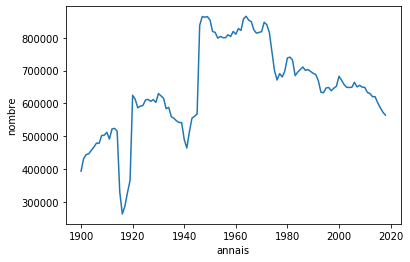

In [43]:
sns.lineplot(
    x="annais", 
    y="nombre", 
    data=prenoms.groupby('annais').agg({'nombre': sum}).reset_index()
)


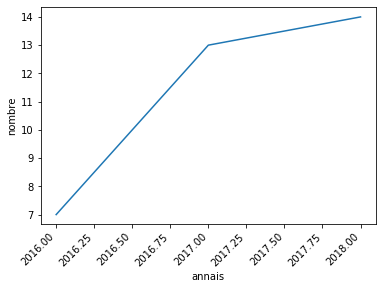

In [66]:
agg_1 = prenoms[prenoms.annais != 'XXXX'].groupby(['preusuel', 'annais']).agg({'nombre': sum}).reset_index()

agg_1.annais = agg_1.annais.apply(int)

chart = sns.lineplot(
    x="annais",
    y="nombre", 
    data=agg_1[agg_1.preusuel.isin(['Aras'])]
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.show()
